In [163]:
import pandas as pd
import numpy as ny
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
import xgboost as xgb
import sklearn
from sklearn.metrics import explained_variance_score
from xgboost.sklearn import XGBClassifier

In [3]:
df_train = pd.read_csv(r'C:\Users\ajit.jain\Desktop\Folder_Code\Titanic\train.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ny.shape(df_train)

(891, 12)

In [6]:
type(df_train)

pandas.core.frame.DataFrame

In [7]:
#null_columns = df_train.columns[df_train.isnull().any()]
#df_train[null_columns].isnull().sum()

In [8]:
def col_null(x):
    null_columns = x.columns[x.isnull().any()]
    print(x[null_columns].isnull().sum())

In [9]:
col_null(df_train)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [10]:
#max_nan = 0
#min_cab = 1000
#for i in range(1,len(df_train)):
#    if (df_train.Cabin[i] == None):
#        if (df_train.Fare[i]>max_nan):
#           max_nan = df_train.Fare[i]
#           print(i,max_nan)
#           
#   else :
#       if (df_train.Fare[i]<min_cab):
#           min_cab = df_train.Fare[i]
#           print(i,min_cab)
                

In [34]:
#print(max_nan,min_cab)

In [35]:
df_excabem = df_train.drop(columns=['Cabin','Embarked','Name','Ticket','PassengerId'], axis =1)

In [36]:
df_excabem.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [37]:
col_null(df_excabem)

Age    177
dtype: int64


In [38]:
df_excabem=pd.get_dummies(df_excabem)

In [39]:
#df_nul = pd.isnull(df_excabem)

In [40]:
#ny.shape(df_nul)

In [41]:
#m = 0
#n = 0
#for i in range(len(df_excabem)):
#   if (pd.isnull(df_excabem.Age[i])):
#       df_agenull[m] = df_excabem[i]
#        m = m+1
#    else:
#        df_age[n]=df_excabem[i]
#        n = n+1        

In [109]:
df_age=df_excabem.dropna()
pd.DataFrame(df_age).to_csv('df_age.csv')

In [43]:
col_null(df_age)
ny.shape(df_age)

Series([], dtype: float64)


(714, 8)

In [44]:
df_notage = df_excabem[df_excabem.isnull().any(axis=1)]

In [45]:
col_null(df_notage)
ny.shape(df_notage)

Age    177
dtype: int64


(177, 8)

In [46]:
df_age.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [47]:
X_train_age, X_test_age, y_train, y_test = train_test_split(df_age, df_age["Age"], test_size=0.2)
print (X_train_age.shape, y_train.shape)
print (X_test_age.shape, y_test.shape)

(571, 8) (571,)
(143, 8) (143,)


In [48]:
X_train=X_train_age.drop(["Age"],axis=1)
X_test=X_test_age.drop(["Age"],axis=1)
print(X_train.shape)
print(X_test.shape)

(571, 7)
(143, 7)


In [81]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',max_depth=10,subsample=0.9,colsample_bytree=0.9,booster='gbtree',learning_rate=0.3)

In [82]:
print(xg_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9, verbosity=1)


In [83]:
age_model_test = xg_reg.fit(X_train, y_train)
predictions = age_model_test.predict(X_test)

C:\Users\ajit.jain\AppData\Local\Continuum\miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [84]:
#print(predictions)
#print(X_test)

In [85]:
predictions=ny.round(predictions,1)
print(explained_variance_score(y_test,predictions))

0.09235009010848827


Text(0, 0.5, 'Predictions')

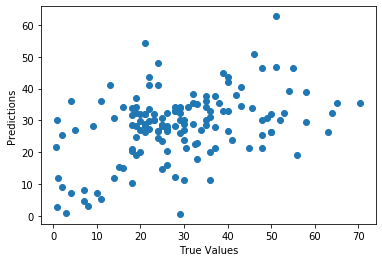

In [86]:
pd.DataFrame(predictions).to_csv('check.csv')
pd.DataFrame(y_test).to_csv('checkt.csv')
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [87]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
Survived      714 non-null int64
Pclass        714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_female    714 non-null uint8
Sex_male      714 non-null uint8
dtypes: float64(2), int64(4), uint8(2)
memory usage: 40.4 KB


In [88]:
df_trainy = df_age["Age"]

In [89]:
df_trainx = df_age.drop(["Age"],axis=1)

In [90]:
df_trainx.info()

In [91]:
ny.shape(df_trainy)

In [92]:
df_trainy.head()

In [93]:
#xg_reg.fit(df_trainx,df_trainy)

In [94]:
df_agepre = df_notage.drop(["Age"],axis =1)
#output1 = xg_reg.predict(data=df_agepre)

In [95]:
#ny.shape(output)
df_agepre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 7 columns):
Survived      177 non-null int64
Pclass        177 non-null int64
SibSp         177 non-null int64
Parch         177 non-null int64
Fare          177 non-null float64
Sex_female    177 non-null uint8
Sex_male      177 non-null uint8
dtypes: float64(1), int64(4), uint8(2)
memory usage: 8.6 KB


In [96]:
age_value = age_model_test.predict(data=df_agepre)

In [97]:
output = ny.round(age_value,1)

In [98]:
print(age_value)

[20.937078  35.987534  15.433477  34.923687  24.808458  28.1525
 48.89207   19.42324   20.158844  28.1525    32.168167  30.878386
 19.42324   15.984828  41.88682   40.14349   17.402662  28.1525
 32.168167  23.168344  32.168167  32.168167  28.1525    23.568014
 21.363842  32.168167  35.526928   9.259849  23.122478  32.091846
 25.461426  15.203112  22.374456  62.10042    7.5566134 17.73579
 22.9439    31.486656  23.761179  35.526928  19.42324   15.203112
 29.364338  28.1525     4.665676  31.27436   14.623917  23.761179
 32.091846  30.759306  35.526928  21.162746  56.38429   19.42324
 39.711567  63.905205  40.14349   37.964577  19.42324   12.309779
 29.929611  32.168167  21.90112   15.203112   8.227497  37.49339
 28.1525    19.114779  70.69492   34.923687  24.808458  24.808458
 30.878386  13.088649  19.42324   27.860786  28.1525    20.9836
  4.665676  28.1525    18.881506  39.711567  28.274815  28.1525
 32.091846  35.526928  19.114779  18.748457  17.60687   32.168167
 36.59633   35.526928

In [217]:
age_value.shape

(177,)

In [100]:
pd.DataFrame(output).to_csv('age_pred.csv')

In [102]:
df_agepre["Age"]=output

In [103]:
print(df_agepre)

     Survived  Pclass  SibSp  Parch     Fare  Sex_female  Sex_male        Age
5           0       3      0      0   8.4583           0         1  20.900000
17          1       2      0      0  13.0000           0         1  36.000000
19          1       3      0      0   7.2250           1         0  15.400000
26          0       3      0      0   7.2250           0         1  34.900002
28          1       3      0      0   7.8792           1         0  24.799999
..        ...     ...    ...    ...      ...         ...       ...        ...
859         0       3      0      0   7.2292           0         1  27.400000
863         0       3      8      2  69.5500           1         0  17.700001
868         0       3      0      0   9.5000           0         1  24.400000
878         0       3      0      0   7.8958           0         1  28.200001
888         0       3      1      2  23.4500           1         0  21.100000

[177 rows x 8 columns]


In [106]:
df_comp_train = pd.concat([df_age,df_agepre])

C:\Users\ajit.jain\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [108]:
print(df_comp_train)
pd.DataFrame(df_comp_train).to_csv('df_comp_train.csv')

           Age     Fare  Parch  Pclass  Sex_female  Sex_male  SibSp  Survived
0    22.000000   7.2500      0       3           0         1      1         0
1    38.000000  71.2833      0       1           1         0      1         1
2    26.000000   7.9250      0       3           1         0      0         1
3    35.000000  53.1000      0       1           1         0      1         1
4    35.000000   8.0500      0       3           0         1      0         0
..         ...      ...    ...     ...         ...       ...    ...       ...
859  27.400000   7.2292      0       3           0         1      0         0
863  17.700001  69.5500      2       3           1         0      8         0
868  24.400000   9.5000      0       3           0         1      0         0
878  28.200001   7.8958      0       3           0         1      0         0
888  21.100000  23.4500      2       3           1         0      1         0

[891 rows x 8 columns]


In [129]:
X_train_sur, X_test_sur, y_train_sur, y_test_sur = train_test_split(df_comp_train, df_comp_train["Survived"], test_size=0.2)

In [130]:
X_train_sur.head()

,Age,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp,Survived
766,38.599998,39.60,0,1,0,1,0,0
208,16.000000,7.75,0,3,1,0,0,1
588,22.000000,8.05,0,3,0,1,0,0
386,1.000000,46.90,2,3,0,1,5,0
529,23.000000,11.50,1,2,0,1,2,0


In [131]:
X_test_sur.head()

,Age,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp,Survived
418,30.000000,13.0000,0,2,0,1,0,0
277,39.700001,0.0000,0,2,0,1,0,0
850,4.000000,31.2750,2,3,0,1,4,0
710,24.000000,49.5042,0,1,1,0,0,1
387,36.000000,13.0000,0,2,1,0,0,1


In [132]:
y_train_sur.head()

766    0
208    1
588    0
386    0
529    0
Name: Survived, dtype: int64

In [133]:
 y_test_sur.head()

418    0
277    0
850    0
710    1
387    1
Name: Survived, dtype: int64

In [134]:
X_test_sur=X_test_sur.drop(["Survived"],axis=1)
X_train_sur=X_train_sur.drop(["Survived"],axis=1)
X_test_sur.head()
X_train_sur.head()

,Age,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
766,38.599998,39.60,0,1,0,1,0
208,16.000000,7.75,0,3,1,0,0
588,22.000000,8.05,0,3,0,1,0
386,1.000000,46.90,2,3,0,1,5
529,23.000000,11.50,1,2,0,1,2


In [147]:
xg_class = xgb.XGBClassifier(max_depth=10,learning_rate=0.1)

In [148]:
print(xg_class)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [149]:
sur_model_test = xg_class.fit(X_train_sur, y_train_sur)
predictions_sur = sur_model_test.predict(X_test_sur)

In [150]:
print(explained_variance_score(y_test_sur,predictions_sur))

0.25508607198748035


In [245]:
param_test1 = {
 'max_depth':range(3,12,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=100, gamma=0, 
 subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=0, scale_pos_weight=1, seed=None), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_sur, y_train_sur)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.03, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=7000, n_jobs=1,
                                     nthread=0, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 12, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, r

In [209]:
print(gsearch1.scorer_)

make_scorer(roc_auc_score, needs_threshold=True)


In [210]:
print(gsearch1.best_params_)

{'max_depth': 9, 'min_child_weight': 3}


In [211]:
print(gsearch1.best_score_)

0.8792932603185413


In [212]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, gamma=0, 
 subsample=0.8, colsample_bytree=0.8,max_depth=9, min_child_weight=3,
 objective= 'binary:logistic', nthread=0, scale_pos_weight=1, seed=None), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train_sur, y_train_sur)
#gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=3,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=0, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', 

In [213]:
print(gsearch2.best_params_)

{'gamma': 0.0}


In [214]:
print(gsearch2.best_score_)

0.8792932603185413


In [215]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, gamma=0, 
 subsample=0.8, colsample_bytree=0.8,max_depth=9, min_child_weight=3,
 objective= 'binary:logistic', nthread=0, scale_pos_weight=1, seed=None), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train_sur, y_train_sur)
print(gsearch3.best_params_), print(gsearch3.best_score_)

{'colsample_bytree': 0.8, 'subsample': 0.8}
0.8792932603185413


(None, None)

In [216]:
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, gamma=0, 
 subsample=0.8, colsample_bytree=0.8,max_depth=9, min_child_weight=3,
 objective= 'binary:logistic', nthread=0, scale_pos_weight=1, seed=None), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train_sur, y_train_sur)
print(gsearch4.best_params_), print(gsearch4.best_score_)

{'reg_alpha': 1e-05}
0.8792932603185413


(None, None)

In [241]:
xg_class1 = xgb.XGBClassifier(learning_rate =0.03, n_estimators=7000, gamma=0, 
 subsample=0.8, colsample_bytree=0.8,max_depth=9, min_child_weight=3,reg_alpha=1e-05,
 objective= 'binary:logistic', nthread=0, scale_pos_weight=1, seed=None)

In [242]:
print(xg_class1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=7000, n_jobs=1,
              nthread=0, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)


In [243]:
sur_model_test1 = xg_class1.fit(X_train_sur, y_train_sur)
predictions_sur1 = sur_model_test1.predict(X_test_sur)

In [244]:
print(explained_variance_score(y_test_sur,predictions_sur1))

0.13641105894627004


In [246]:
df_test_ori = pd.read_csv(r'C:\Users\ajit.jain\Desktop\Folder_Code\Titanic\test.csv')

In [247]:
df_test_ori.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [250]:
df_data_test=df_test_ori.iloc[:,[1,3,4,5,6,8]]

In [254]:
df_data_test_dum=pd.get_dummies(df_data_test)

In [257]:
df_data_test_dum.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [259]:
df_testing = df_data_test_dum.iloc[:,[1,4,3,0,5,6,2]]

In [260]:
df_testing.head()

,Age,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
0,34.5,7.8292,0,3,0,1,0
1,47.0,7.0000,0,3,1,0,1
2,62.0,9.6875,0,2,0,1,0
3,27.0,8.6625,0,3,0,1,0
4,22.0,12.2875,1,3,1,0,1


In [261]:
X_test_sur.head()

,Age,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
418,30.000000,13.0000,0,2,0,1,0
277,39.700001,0.0000,0,2,0,1,0
850,4.000000,31.2750,2,3,0,1,4
710,24.000000,49.5042,0,1,1,0,0
387,36.000000,13.0000,0,2,1,0,0


In [262]:
predictions_test = sur_model_test1.predict(df_testing)

In [263]:
pd.DataFrame(predictions_test).to_csv('predictions_test.csv')